In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix_titles.csv')

This notebook presents an exploratory data analysis (EDA) of the Netflix dataset. The goal is to understand the structure, trends, and patterns in the available Netflix content.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg" width="400">


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Duplicate rows were removed to avoid counting the same data multiple times. This helps keep the analysis accurate and unbiased. 

In [5]:
int(df.duplicated().sum())

0

Some missing values were filled with typical or “Unknown” labels to keep the data complete. Rows missing important information were removed to ensure accurate analysis.

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
#df['rating'] = df['rating'].cat.add_categories(['Not Rated'])
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

We converted some columns to more suitable data types to make the data easier to work with and to save memory. For example, changing text categories to “category” type helps with faster analysis.

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
category_cols = ['type','country','rating']
for col in category_cols:
    df[col] = df[col].astype('category')

In [13]:
df.dtypes

show_id                 object
type                  category
title                   object
director                object
cast                    object
country               category
date_added      datetime64[ns]
release_year             int64
rating                category
duration                object
listed_in               object
description             object
dtype: object

In [14]:
df.describe()

,date_added,release_year
count,8709,8807.000000
mean,2019-05-23 01:45:29.452290816,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-20 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   category      
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   category      
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(3), datetime64[ns](1), int64(1), object(7)
memory usage: 676.6+ KB


In [16]:
show_type = df.groupby('type')['show_id'].count()
show_type

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [17]:
df['month_added'] = df['date_added'].dt.month_name()

In [18]:
month = df.groupby('month_added')['show_id'].count()
month

month_added
April        759
August       749
December     797
February     557
January      727
July         819
June         724
March        734
May          626
November     697
October      755
September    765
Name: show_id, dtype: int64

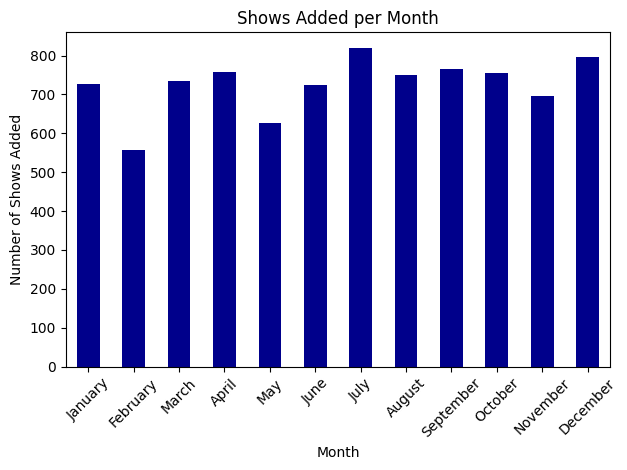

In [19]:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
month = month.reindex(ordered_months).fillna(0)
month.plot(kind='bar',color='darkblue')
plt.xlabel('Month')
plt.ylabel('Number of Shows Added')
plt.title('Shows Added per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

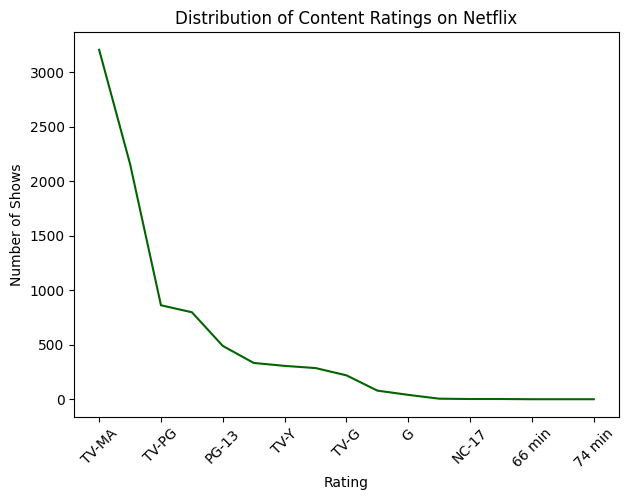

In [20]:
df['rating'] = df['rating'].replace('Not Rated',np.nan)
df['rating'].value_counts().plot(kind='line',color='darkgreen')
plt.title('Distribution of Content Ratings on Netflix')  
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

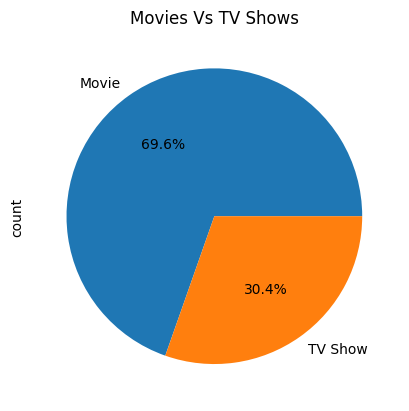

In [21]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Movies Vs TV Shows")
plt.show()

In [22]:
df['director'] = df['director'].replace('Unknown',np.nan)
df['director'] = df['director'].str.split(',')
df = df.explode('director')
df['director'] = df['director'].str.strip()
top_10_dir = df['director'].value_counts().head(10)

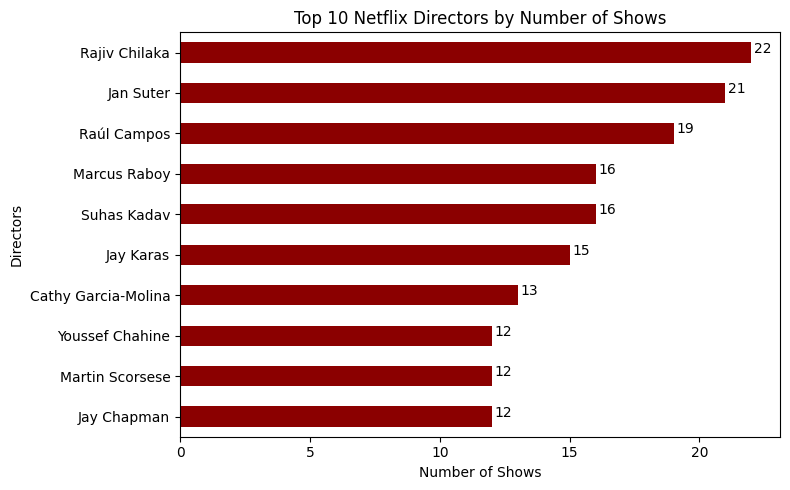

In [23]:
top_10_dir.plot(kind='barh',color='darkred',figsize=(8,5))
for index, value in enumerate(top_10_dir):
    plt.text(value + 0.1, index, str(value))
plt.title("Top 10 Netflix Directors by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Directors")
plt.gca().invert_yaxis()
plt.tight_layout()

In [24]:
df['listed_in'] = df['listed_in'].str.split(',')
df = df.explode('listed_in')
df['listed_in'] = df['listed_in'].str.strip()
genre = df['listed_in'].value_counts()

Text(0, 0.5, 'Genres')

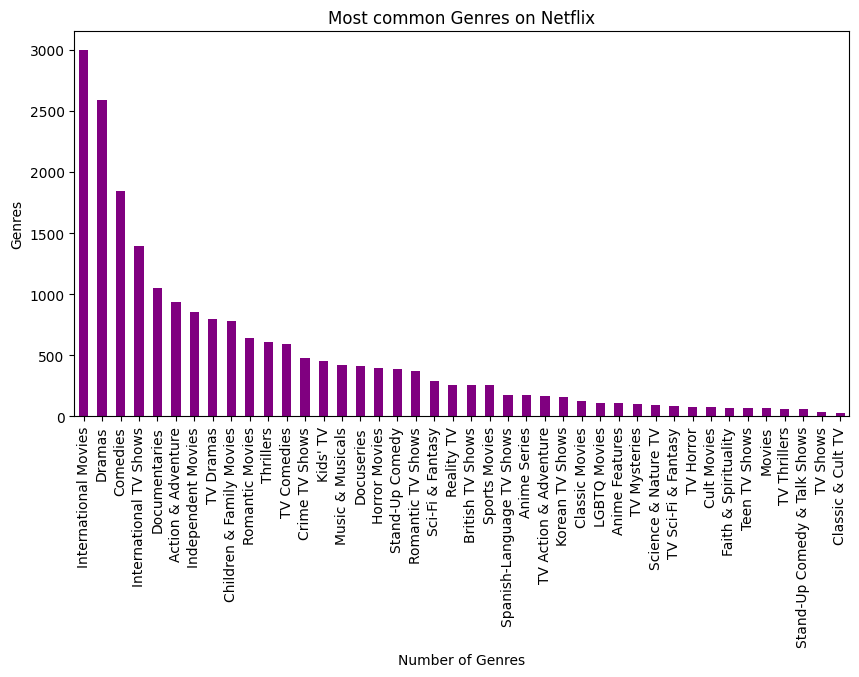

In [25]:
genre.plot(kind='bar',figsize=(10,5),color='purple')
plt.title("Most common Genres on Netflix")
plt.xlabel("Number of Genres")
plt.ylabel("Genres")

In [26]:
df['country'] = df['country'].replace('Unknown',np.nan)
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()
top_10_cont = df['country'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 Countries Producing Netflix Content')

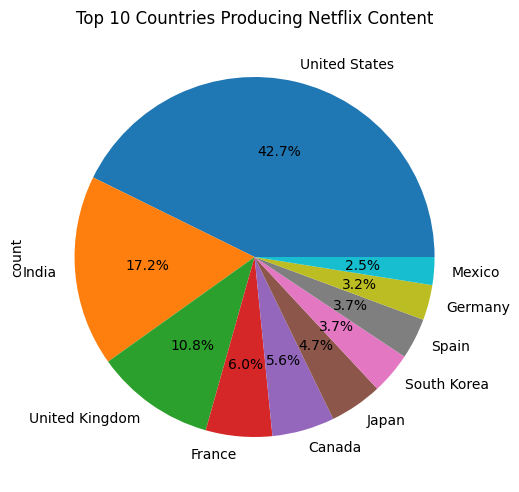

In [27]:
top_10_cont.plot(kind='pie',autopct='%1.1f%%')
plt.tight_layout()
plt.title("Top 10 Countries Producing Netflix Content")

**Insights**

__1. Number of Shows Added by Month__

Netflix shows a consistent pattern of adding new titles throughout the year, with noticeable peaks during certain months, likely timed to coincide with peak viewing seasons such as summer and holidays. This strategy helps maintain user engagement year-round.

__2. Distribution of Content Ratings__

The majority of Netflix content falls under mature audience ratings like TV-MA and TV-14, indicating a focus on adult viewers while still offering a range of ratings to comply with regional guidelines and appeal to diverse age groups.

__3. TV Shows vs Movies__

Netflix maintains a balanced content library between TV shows and movies, providing viewers with both quick, standalone entertainment and longer-form series that encourage ongoing viewer engagement.

__4. Top 10 Directors by Number of Shows__

A select group of directors contributes a significant number of shows on Netflix, highlighting the platform’s reliance on trusted creative partnerships to drive content production.

__5. Most Common Genres on Netflix__

Genres such as International Movies, Dramas, and Comedies dominate the Netflix catalog, reflecting the platform’s commitment to catering to broad and international audience tastes with a diverse range of storytelling styles.

__6. Top 10 Countries by Content Counts__

Content production is concentrated in a few key countries like the United States, India, and the United Kingdom, showcasing Netflix’s global reach and its focus on major production hubs to fuel its content library.

**Conclusion**

- Netflix offers a wide variety of content, with international movies and dramas being the most common genres.
- The number of shows added each month shows consistent growth in content.
- Top directors and countries indicate where most content originates from.
- TV shows and movies have a balanced presence, catering to different viewer preferences.
